# Othello game bitboard

I'll use this Jupyter notebook to explore Othello bitboards and understand move generation, etc.

I developed a specific Python3 module which generates SVG Othello board diagrams.

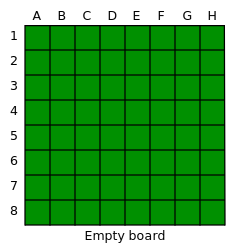

In [1]:
from IPython.display import SVG, HTML

# my othello module
import othello

# board width & heigth set here
board_width = board_height = 250

# create an empty SVG board
board = othello.SVGBoard(board_width, board_height)
board.draw_legend('Empty board')
board.close()

# use SVG INotebook display facility to print out embeded SVG 
SVG(board.doc.tags)

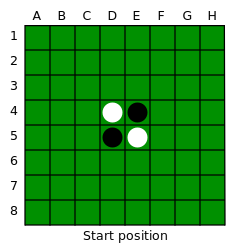

In [2]:
# reset previously defined board
board.reset()

# draw pieces
board.draw_piece_from_algebric("D4", othello.Color.white)
board.draw_piece_from_algebric("E5", othello.Color.white)
board.draw_piece_from_algebric("E4", othello.Color.black)
board.draw_piece_from_algebric("D5", othello.Color.black)
board.draw_legend('Start position')
board.close()

# use SVG INotebook display facility to print out embeded SVG 
SVG(board.doc.tags)

The 8x8 Othello board is conveniently modelled using a 64-bit integer called a bitboard. Pieces can be drawn also using a 64-bit integer.

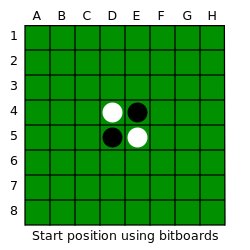

In [3]:
board.reset()

# draw pieces
white = othello.Bitboard(0b00000000_00000000_00000000_00010000_00001000_00000000_00000000_00000000)
black = othello.Bitboard(0b00000000_00000000_00000000_00001000_00010000_00000000_00000000_00000000)

board.draw_pieces_from_bitboard(white, othello.Color.white)
board.draw_pieces_from_bitboard(black, othello.Color.black)

board.draw_legend('Start position using bitboards')
board.close()

# use SVG INotebook display facility to print out embeded SVG 
SVG(board.doc.tags)

## Operations on bitboards
### Union

In [11]:
# create 3 boards for displaying operations on bitboards. We'll reuse them across cells
board1 = othello.SVGBoard(board_width, board_height, False)
board2 = othello.SVGBoard(board_width, board_height, False)
board3 = othello.SVGBoard(board_width, board_height, False)


bb1 = othello.Bitboard(0b00000000_00000000_00111100_00100100_00100100_00111100_00000000_00000000)
bb2 = othello.Bitboard(0b00000000_00000000_00000000_00011000_00011000_00000000_00000000_00000000)

board1.draw_pieces_from_bitboard(bb1, othello.Color.black)
board2.draw_pieces_from_bitboard(bb2, othello.Color.black)
board3.draw_pieces_from_bitboard(bb1|bb2, othello.Color.white, 0.1)

board1.close()
board2.close()
board3.close()

# print boards side by side
display(HTML(othello.SVGBoard.combine(board1.doc.tags, board2.doc.tags, board3.doc.tags)))


### Intersection

In [16]:
# reset boards
board1.reset(False)
board2.reset(False)
board3.reset(False)

bb3 = othello.Bitboard(0b00000000_00000000_00111100_00000000_00000000_00000000_00000000_00000000)

board1.draw_pieces_from_bitboard(bb1, othello.Color.black)
board2.draw_pieces_from_bitboard(bb3, othello.Color.black)
board3.draw_pieces_from_bitboard(bb1&bb3, othello.Color.white, 0.1)

board1.close()
board2.close()
board3.close()

# print boards side by side
display(HTML(othello.SVGBoard.combine(board1.doc.tags, board2.doc.tags, board3.doc.tags)))

### Negate

In [17]:
# reset 2 boards
board1.reset(False)
board3.reset(False)

board1.draw_pieces_from_bitboard(bb3, othello.Color.black)
board3.draw_pieces_from_bitboard(~bb3, othello.Color.white, 0.1)

board1.close()
board3.close()


# print both side by side
display(HTML(othello.SVGBoard.combine(board1.doc.tags, board3.doc.tags)))

